In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# File paths
train_file = '../poker+hand/poker-hand-training-true.data'
test_file = '../poker+hand/poker-hand-testing.data'

In [3]:
# Load the training data (assumes comma-separated format)
train_data = np.loadtxt(train_file, delimiter=',')
X_train = train_data[:, :-1]           # All columns except the last are features
y_train = train_data[:, -1].astype(int)  # The last column is the target

# Load the testing data
test_data = np.loadtxt(test_file, delimiter=',')
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (25010, 10) (25010,)
Testing data shape: (1000000, 10) (1000000,)


In [4]:
# 2. Create a Pipeline
# Even though scaling is not required for tree-based models, including it here keeps the structure similar.
pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

In [5]:
# 3. Define the Hyperparameter Grid for the Gradient Boosting Model
param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1.0],
    'gradientboostingclassifier__max_depth': [3, 5, 7]
}

# Set up GridSearchCV with 5-fold cross-validation and parallel processing
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=4)

print("Starting grid search for Gradient Boosting...")
grid_search.fit(X_train, y_train)
print("Grid search complete.")

Starting grid search for Gradient Boosting...
Grid search complete.


In [7]:
# 4. Output Grid Search Results and Evaluate on Test Data
print("\nBest Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the testing set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy: {:.4f}".format(accuracy))
print("\nClassification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters Found:
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__n_estimators': 200}
Best Cross-Validation Score: 0.7658

Test Accuracy: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87    501209
           1       0.76      0.75      0.76    422498
           2       0.30      0.06      0.10     47622
           3       0.59      0.08      0.15     21121
           4       0.08      0.01      0.02      3885
           5       0.38      0.23      0.29      1996
           6       0.02      0.00      0.01      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.33      0.00         3

    accuracy                           0.79   1000000
   macro avg       0.29      0.24      0.22   1000000
weighted avg       0.76      0.79      0.77  

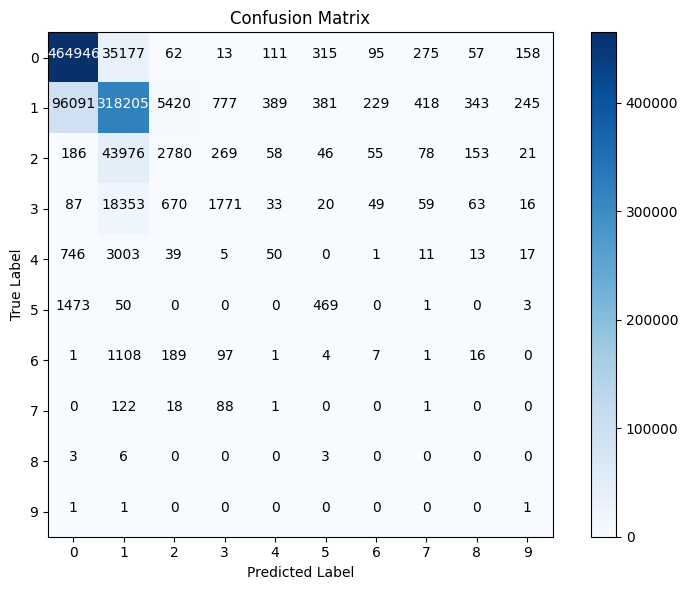

In [11]:
# 5. Visualize the Confusion Matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Assuming target labels are integers - adjust tick labels as needed.
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add labels and ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Optionally add numbers in each cell
threshold = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > threshold else "black")

plt.tight_layout()
plt.show()

In [ ]:
# # 6. Save the Best Model for External Use
# model_filename = 'gradient_boosting_poker_model.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(grid_search.best_estimator_, file)
# print(f"\nModel saved to {model_filename}")